In [1]:
from utils import *

In [2]:
import pickle

In [3]:
conv_dict = pickle.load(open("generated/convall.dict", 'rb'))

In [4]:
for i in conv_dict.keys():
    curr_conv = conv_dict[i]['con'].reset_index().copy().rename(columns={'convexity':'con'})
    for j in ['dss', 'ab', 'dab', 'ab_dss', 'dss_ab']:
        new_conv = conv_dict[i][j].reset_index().copy()
        new_conv.rename(columns={'convexity':f'{j}'}, inplace=True)
        curr_conv = curr_conv.merge(new_conv, how='left', on='Metabolite Name')
    curr_conv.to_csv(f"generated/convexities_{i}.csv")

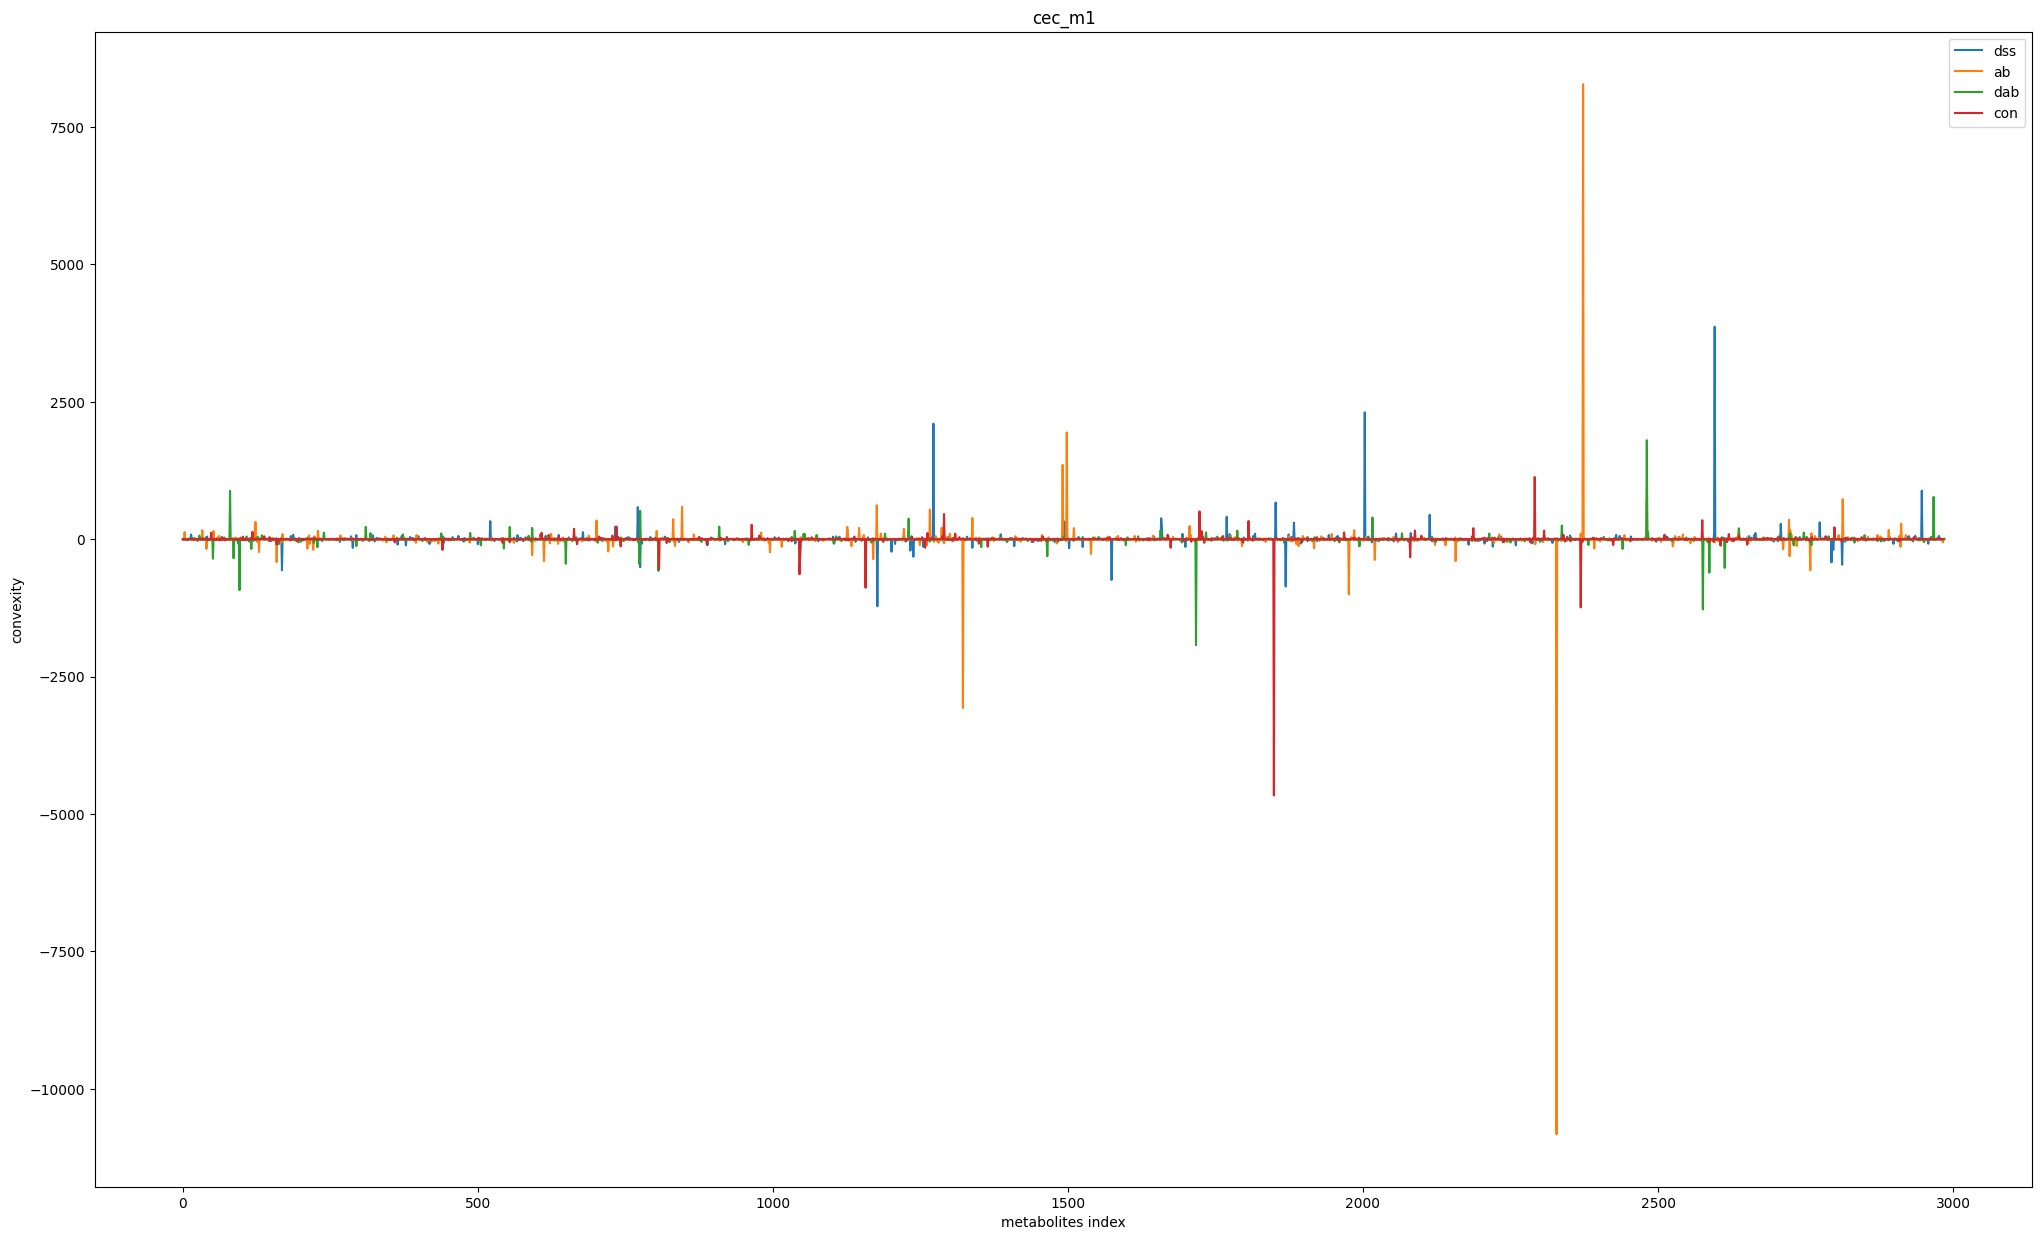

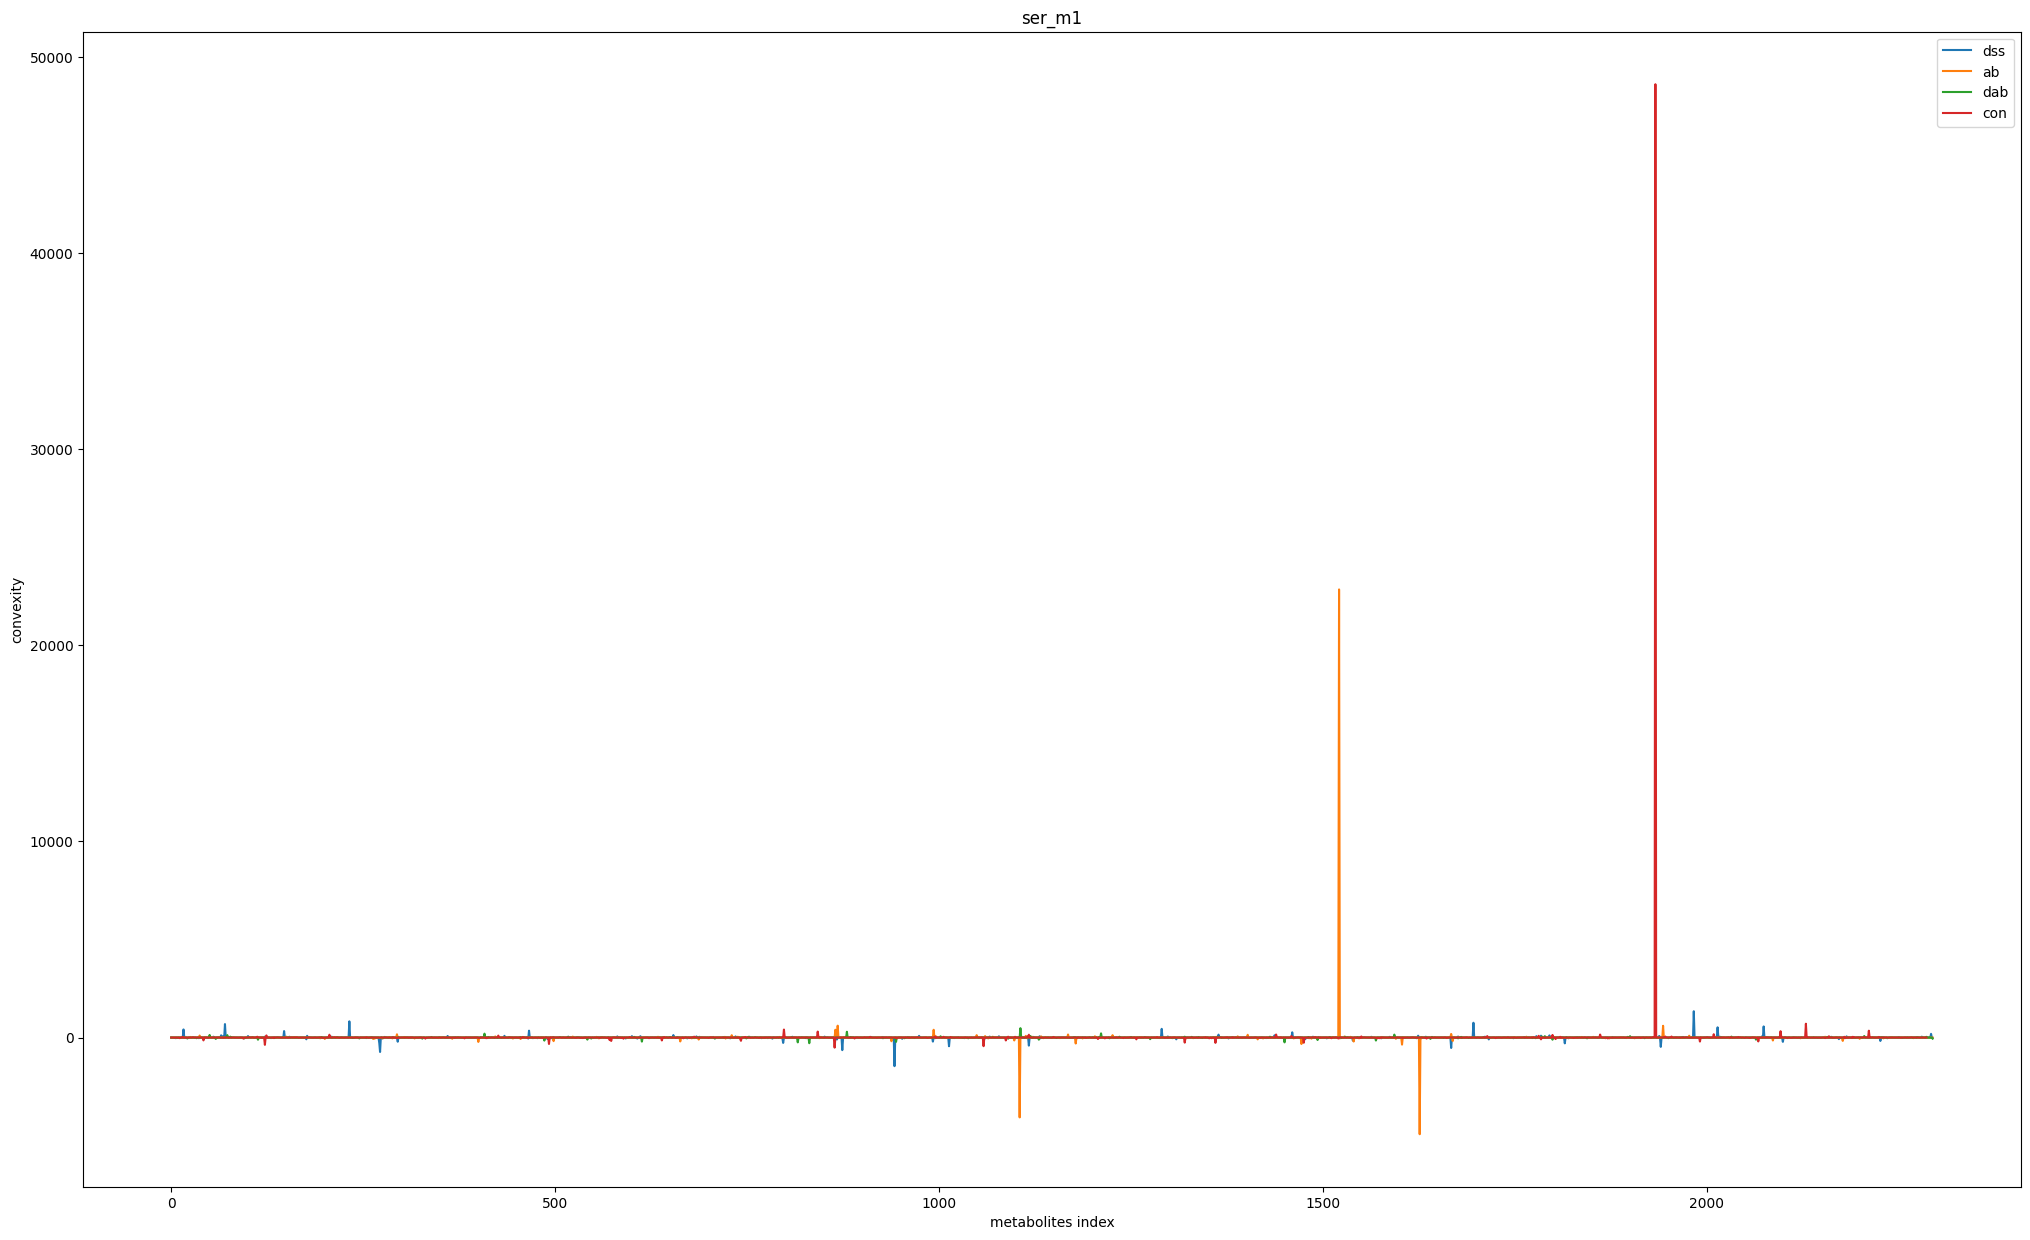

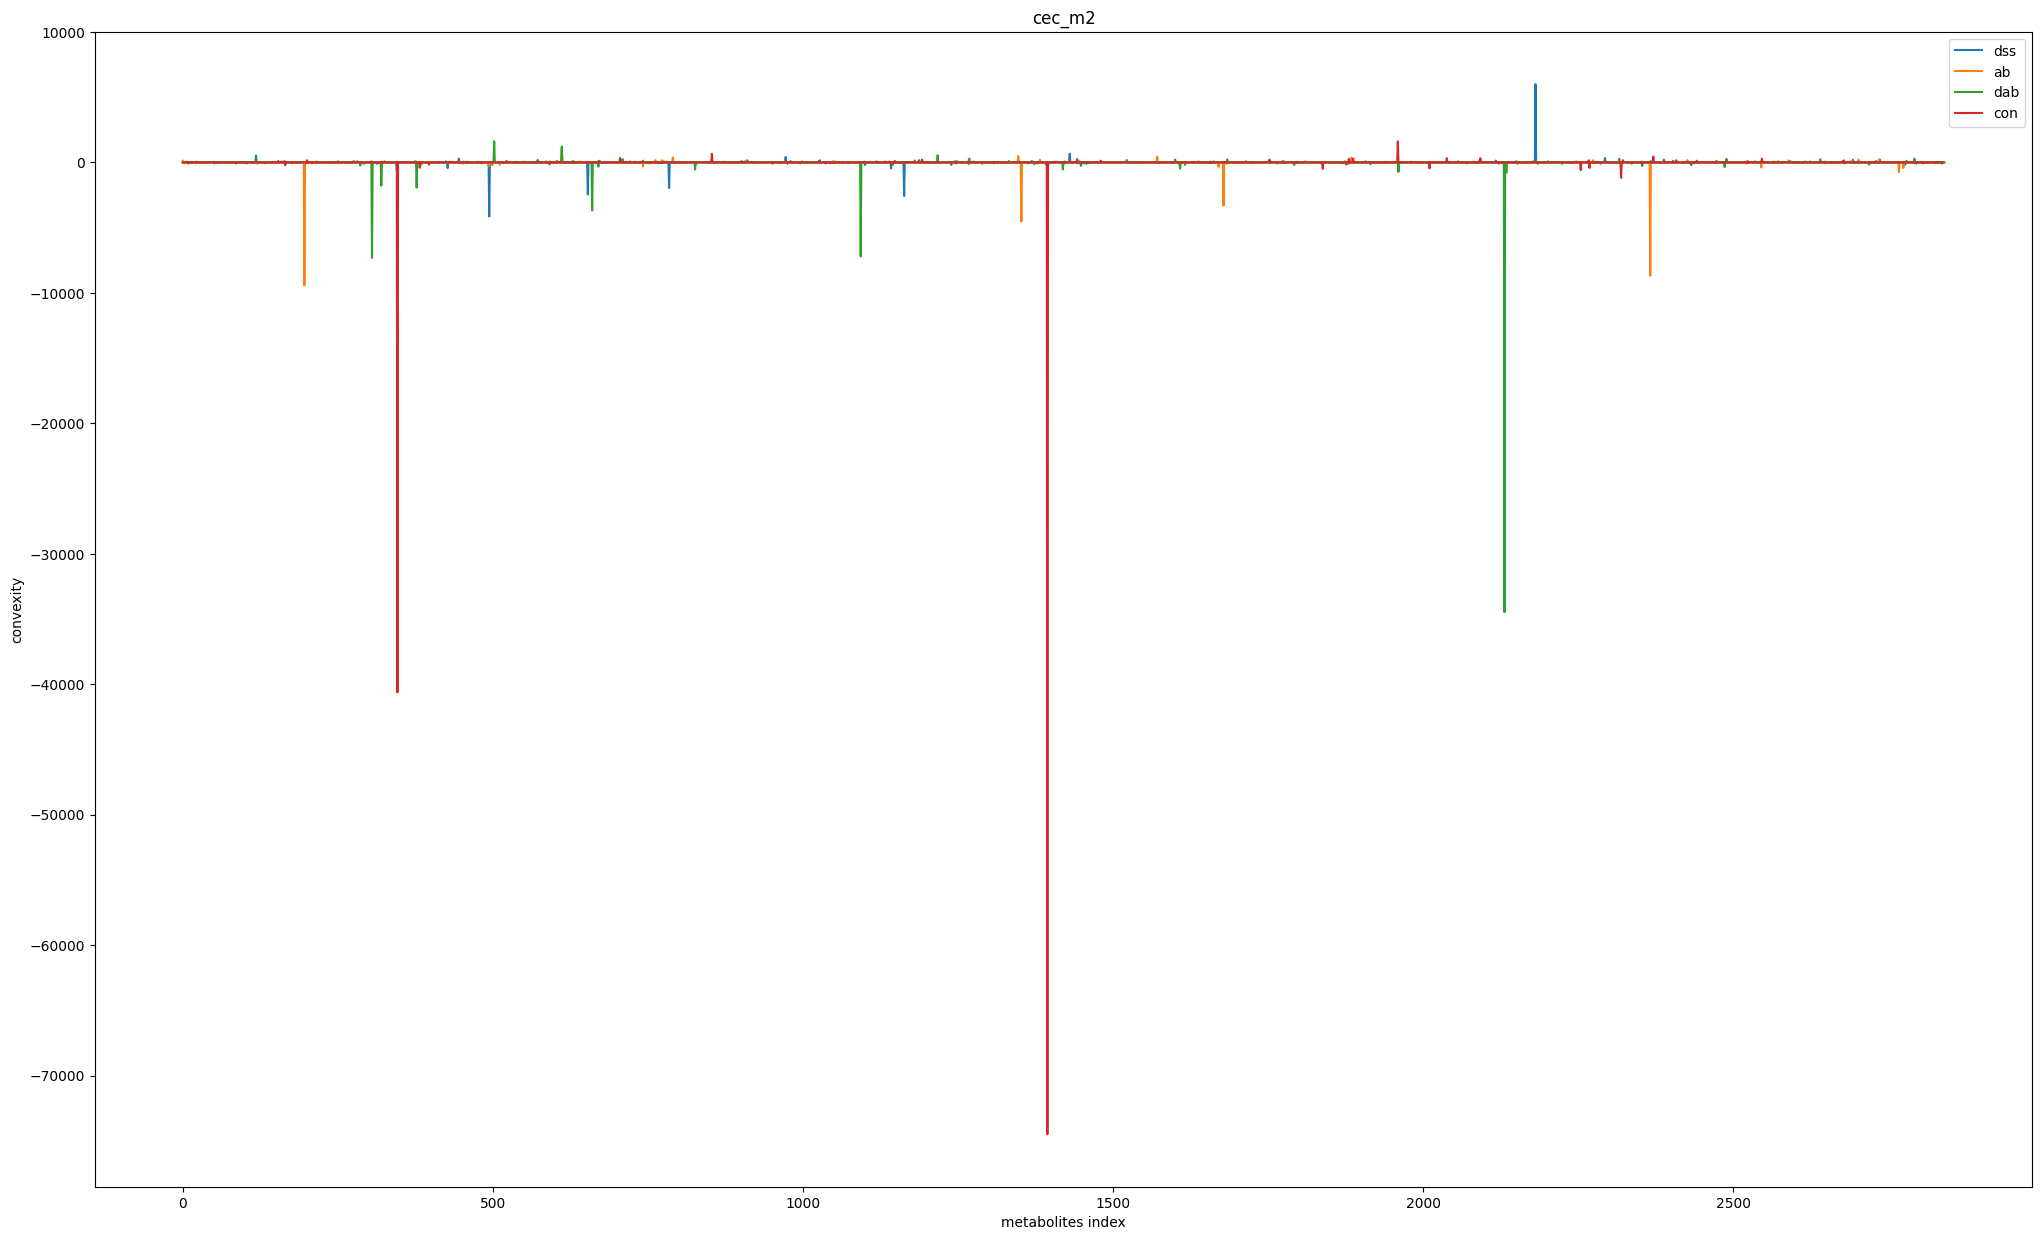

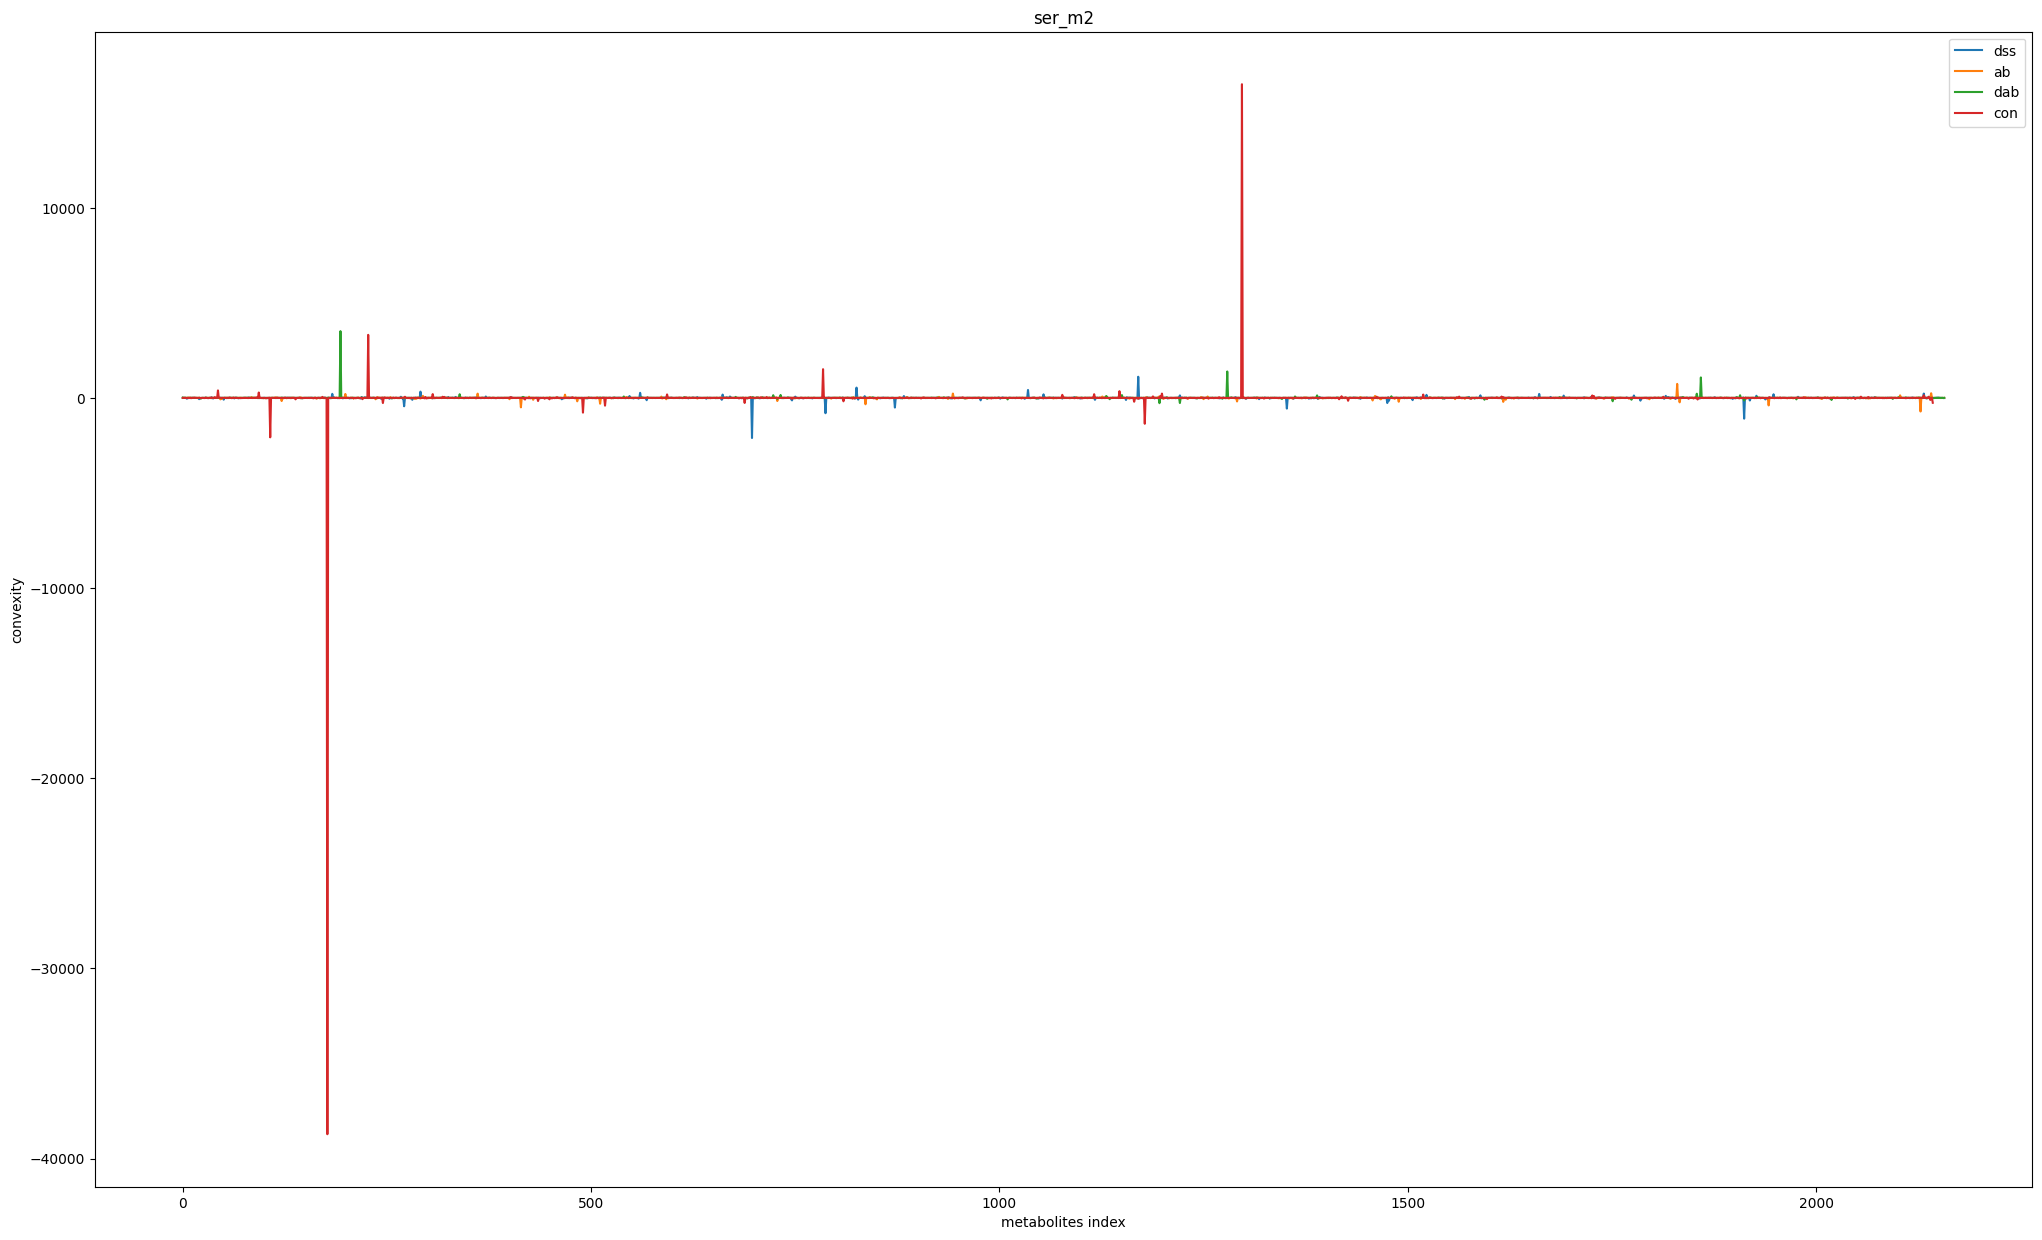

In [5]:
pyplot.rcParams['figure.figsize'] = (25, 15)
for i in conv_dict.keys():
    for j in ['dss', 'ab', 'dab', 'con']:
        pyplot.plot(list(range(len(list(conv_dict[i][j].index)))), conv_dict[i][j]['convexity'])
    pyplot.legend(['dss', 'ab', 'dab', 'con'])
    pyplot.title(str(i))
    pyplot.ylabel("convexity")
    pyplot.xlabel("metabolites index")
    pyplot.show()